In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
dev_convo_df = pd.read_csv('../data/cleaned/dev_conversations.csv')
dev_convo_df.shape

(2642, 15)

In [94]:
dev_convo_df = dev_convo_df.drop_duplicates('Unnamed: 0', keep='first').set_index('Unnamed: 0')
dev_convo_df.shape

(2533, 14)

In [95]:
dev_convo_df

,raw,file_ind,timestamp,minutes,user,user_ind,message,mentions,date,parent,child,file_ind_parent,uuid_parent,conversation_ind
Unnamed: 0,,,,,,,,,,,,,,
2004_11_15_01_35_djtansey_685,[01:35] <djtansey> i have a problem re: k3b an...,685,01:35,815,djtansey,948,i have a problem re: k3b and am looking for so...,-1,2004-11-15,685.0,685.0,685.0,2004_11_15_01_35_djtansey_685,0
2004_11_15_03_41_djtansey_1087,[03:41] <djtansey> does anyone here have k3b e...,1087,03:41,941,djtansey,948,does anyone here have k3b experience? i can re...,-1,2004-11-15,685.0,1087.0,685.0,2004_11_15_01_35_djtansey_685,0
2004_11_15_03_42_Nafallo_1090,[03:42] <Nafallo> djtansey: k3b won't work wit...,1090,03:42,942,Nafallo,6252,djtansey: k3b won't work with kernel 2.6.8|2.6...,948,2004-11-15,1087.0,1090.0,1087.0,2004_11_15_03_41_djtansey_1087,0
2004_11_15_03_43_djtansey_1092,[03:43] <djtansey> Nafallo: so go back to 2.6.7?,1092,03:43,943,djtansey,948,Nafallo: so go back to 2.6.7?,6252,2004-11-15,1090.0,1092.0,1090.0,2004_11_15_03_42_Nafallo_1090,0
2004_11_15_03_44_Nafallo_1093,"[03:44] <Nafallo> djtansey: yepp, or upgrade t...",1093,03:44,944,Nafallo,6252,"djtansey: yepp, or upgrade to 2.6.9",948,2004-11-15,1092.0,1093.0,1092.0,2004_11_15_03_43_djtansey_1092,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016_12_19_21_57_zacky83_1244,"[21:57] <zacky83> Hi, I have a problem with fa...",1244,21:57,2037,zacky83,14168,"Hi, I have a problem with fail2ban , it does n...",-1,2016-12-19,1244.0,1244.0,1244.0,2016_12_19_21_57_zacky83_1244,493
2016_12_19_21_57_zacky83_1245,[21:57] <zacky83> who can help me on this,1245,21:57,2037,zacky83,14168,who can help me on this,-1,2016-12-19,1244.0,1245.0,1244.0,2016_12_19_21_57_zacky83_1244,493
2016_12_19_21_58_figure002_1248,[21:58] <figure002> zacky83: did you enable th...,1248,21:58,2038,figure002,6694,zacky83: did you enable the jails?,14168,2016-12-19,1244.0,1248.0,1244.0,2016_12_19_21_57_zacky83_1244,493


In [96]:
convo_groups = dev_convo_df.groupby('conversation_ind')['raw'].count()

In [97]:
convo_groups[convo_groups > 1].describe()

count    235.000000
mean       9.672340
std       11.056918
min        2.000000
25%        3.000000
50%        5.000000
75%       12.000000
max       68.000000
Name: raw, dtype: float64

[Text(0.5, 0, '# Of Messages'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Conversation Lengths')]

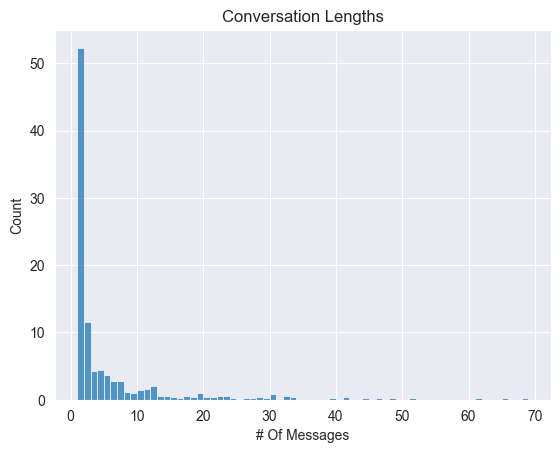

In [33]:
convo_len_plot = sns.histplot(convo_groups, stat='percent')
convo_len_plot.set(xlabel='# Of Messages', ylabel='Count', title='Conversation Lengths')

[Text(0.5, 0, '# Of Messages'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Conversation Lengths')]

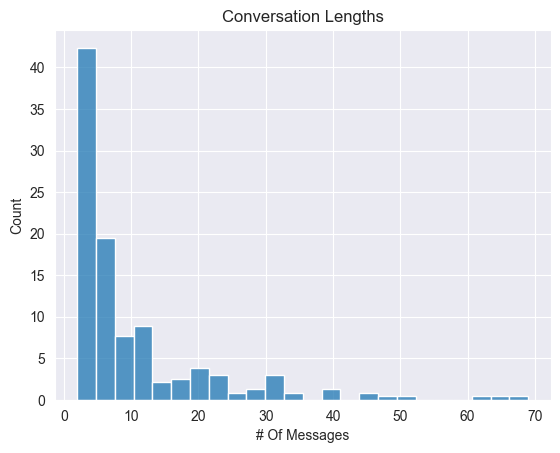

In [34]:
convo_len_plot = sns.histplot(convo_groups[convo_groups > 1], stat='percent')
convo_len_plot.set(xlabel='# Of Messages', ylabel='Count', title='Conversation Lengths')

In [35]:
nonsingle_convo_df = dev_convo_df[dev_convo_df.duplicated(subset='conversation_ind', keep=False)]
user_groups = nonsingle_convo_df.groupby('conversation_ind')['user_ind'].nunique()
user_groups.describe()

count    236.000000
mean       2.677966
std        1.559494
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: user_ind, dtype: float64

[Text(0.5, 0, 'Unique Users (Per Convo)'),
 Text(0, 0.5, 'Percent of Conversations'),
 Text(0.5, 1.0, 'Unique Users Per Conversation')]

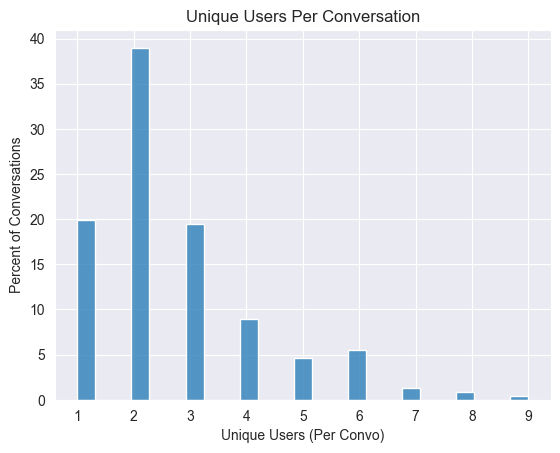

In [36]:
unique_user_plot = sns.histplot(data=user_groups, stat='percent')
unique_user_plot.set(xlabel='Unique Users (Per Convo)', ylabel='Percent of Conversations', title='Unique Users Per Conversation')

In [56]:
dev_convo_df.loc[uuid_parent]

raw                 [01:35] <djtansey> i have a problem re: k3b an...
file_ind                                                          685
timestamp                                                       01:35
minutes                                                           815
user                                                         djtansey
user_ind                                                          948
message             i have a problem re: k3b and am looking for so...
mentions                                                           -1
date                                                       2004-11-15
parent                                                          685.0
child                                                           685.0
file_ind_parent                                                 685.0
uuid_parent                             2004_11_15_01_35_djtansey_685
conversation_ind                                                    0
Name: 2004_11_15_01_

In [98]:
metrics = {
    'minute_distance': [],
    'index_distance': [],
    'mentions': [],
}
for ind, row in dev_convo_df.iterrows():
    uuid_parent = row['uuid_parent']
    if uuid_parent != ind:
        parent_row = dev_convo_df.loc[uuid_parent]
        # Minutes
        try:
            test_int = int(row['minutes'])
            parent_int = int(parent_row['minutes'])
        except:
            #print(row)
            print(parent_row)
            break
        time_dist = row['minutes'] - parent_row['minutes']

        # Index
        ind_dist = row['file_ind'] - parent_row['file_ind']

        # mention
        mentioned = row['mentions'] >= 0

        metrics['minute_distance'].append(time_dist)
        metrics['index_distance'].append(ind_dist)
        metrics['mentions'].append(mentioned)

In [99]:
metrics_df = pd.DataFrame.from_dict(metrics)

In [100]:
metrics_df

,minute_distance,index_distance,mentions
0,126,402,False
1,1,3,True
2,1,2,True
3,1,1,True
4,1,2,False
...,...,...,...
2033,0,1,False
2034,1,2,False
2035,0,1,False
2036,1,4,True


In [110]:
metrics_df.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .95])

,minute_distance,index_distance
count,2038.000000,2038.000000
mean,1.634936,8.431305
std,7.385001,34.654490
min,0.000000,1.000000
10%,0.000000,1.000000
20%,0.000000,1.000000
30%,0.000000,2.000000
40%,0.000000,2.000000
50%,1.000000,3.000000
60%,1.000000,4.000000


<AxesSubplot:>

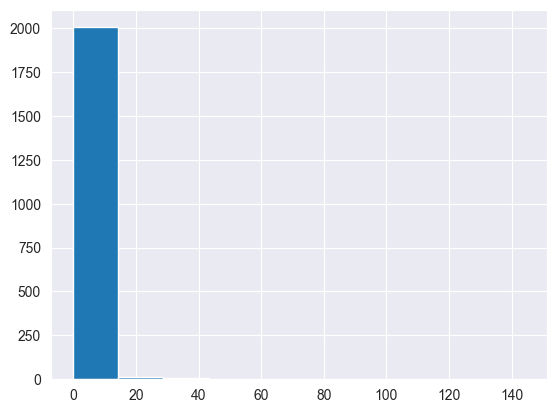

In [102]:
metrics_df['minute_distance'].hist()